<a href="https://colab.research.google.com/github/Abboskhan01/Web_scraping_kun_uz_top10/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

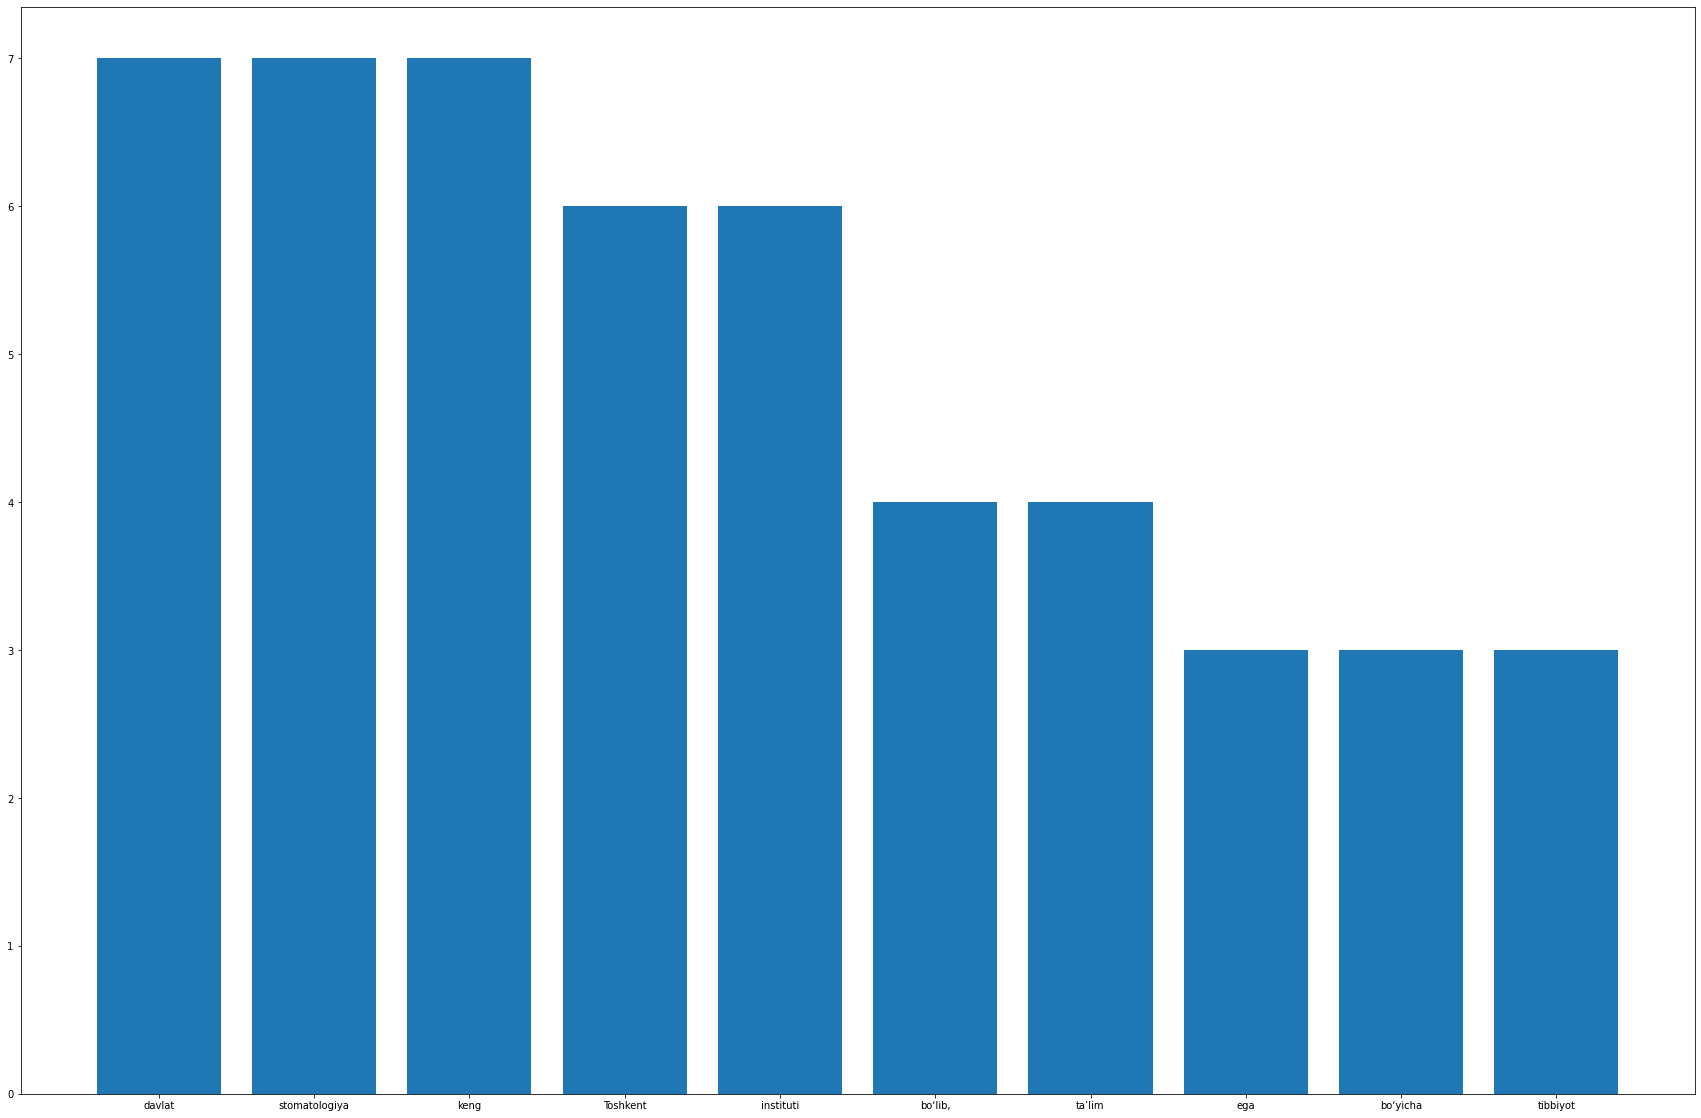

               Count
davlat             7
stomatologiya      7
keng               7
Toshkent           6
instituti          6
bo‘lib,            4
ta’lim             4
ega                3
bo‘yicha           3
tibbiyot           3


In [ ]:
import matplotlib.pyplot
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

page = requests.get("https://kun.uz/uz")
extract = BeautifulSoup(page.text, "html.parser")
data = extract.find_all("a",class_="news-lenta")
new_adress="https://kun.uz"+str(data[4]).split()[2][6:-2]
new_extract = BeautifulSoup(requests.get(new_adress).text, "html.parser")
nam = new_extract.find("div",class_="single-header")
name = nam.select_one("div.single-header__title").text
new_data = new_extract.select_one("div.single-content").text.split()
yordamchi_sozlar=["haqida","bu","ham","deyiladi","bilan","va","ammo","lekin","biroq","yoki","uchun","sabab","vaholanki","naqadar","endi","kegin","biz","men","ular","yo'q","kirib","shunday","bo'lgan","kelib","yanada","deb","bir","ikki","uch","xususan","xabar"]
result = []
for soz in new_data:
    if not soz.isdigit():
        if soz.lower() not in yordamchi_sozlar:
            result.append(soz)
lugat = {}
for k in result:
    if k not in lugat.keys():
        res_count = result.count(k)
        lugat[k] = res_count
df = pd.DataFrame.from_dict(lugat, orient='index')
df2 = df.rename(columns={0:'Count'})
df3 = df2.sort_values(
    'Count',
    ascending=False
)
df4 = df3.iloc[:10,]
x = df4.index
y = df4["Count"].tolist()
matplotlib.pyplot.figure(figsize=(30,20))
plt.bar(x,y)
plt.show()
print(df4)
